In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('hanoi_weather_2001_2024.csv')
df.head()

,Date Time,T2M,ALLSKY_SFC_SW_DWN,RH2M,WS2M,T2MDEW,T2MWET,PS,WS50M,ALLSKY_SFC_LW_DWN,...,WS10M,GWETPROF,TS,WD10M,ALLSKY_SFC_PAR_TOT,QV2M,ALLSKY_KT,CLRSKY_SFC_SW_DWN,GWETROOT,GWETTOP
0,2001-01-01 00:00:00,13.23,0.0,80.27,0.90,9.94,11.58,100.64,2.56,307.38,...,1.69,0.65,10.76,186.5,0.0,7.58,-999.0,0.0,0.59,0.63
1,2001-01-01 01:00:00,12.74,0.0,82.20,0.86,9.81,11.27,100.59,2.45,302.62,...,1.62,0.65,10.36,186.0,0.0,7.52,-999.0,0.0,0.59,0.63
2,2001-01-01 02:00:00,12.41,0.0,83.41,0.78,9.69,11.05,100.56,2.12,303.90,...,1.42,0.65,9.98,189.7,0.0,7.47,-999.0,0.0,0.59,0.63
3,2001-01-01 03:00:00,12.19,0.0,83.84,0.63,9.56,10.88,100.56,1.57,303.05,...,1.07,0.65,9.62,200.8,0.0,7.40,-999.0,0.0,0.59,0.63
4,2001-01-01 04:00:00,11.96,0.0,84.33,0.49,9.42,10.69,100.58,1.10,301.92,...,0.77,0.65,9.30,219.2,0.0,7.33,-999.0,0.0,0.59,0.63


## 1. Kiểm tra NaN

In [3]:
df.isna().sum()

Date Time             0
T2M                   0
ALLSKY_SFC_SW_DWN     0
RH2M                  0
WS2M                  0
T2MDEW                0
T2MWET                0
PS                    0
WS50M                 0
ALLSKY_SFC_LW_DWN     0
WD50M                 0
WD2M                  0
ALLSKY_SFC_SW_DIFF    0
ALLSKY_SFC_SW_DNI     0
ALLSKY_SRF_ALB        0
CLOUD_AMT             0
PRECTOTCORR           0
TOA_SW_DWN            0
WS10M                 0
GWETPROF              0
TS                    0
WD10M                 0
ALLSKY_SFC_PAR_TOT    0
QV2M                  0
ALLSKY_KT             0
CLRSKY_SFC_SW_DWN     0
GWETROOT              0
GWETTOP               0
dtype: int64

## 2. Kiểm tra kiểu dữ liệu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210384 entries, 0 to 210383
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date Time           210384 non-null  object 
 1   T2M                 210384 non-null  float64
 2   ALLSKY_SFC_SW_DWN   210384 non-null  float64
 3   RH2M                210384 non-null  float64
 4   WS2M                210384 non-null  float64
 5   T2MDEW              210384 non-null  float64
 6   T2MWET              210384 non-null  float64
 7   PS                  210384 non-null  float64
 8   WS50M               210384 non-null  float64
 9   ALLSKY_SFC_LW_DWN   210384 non-null  float64
 10  WD50M               210384 non-null  float64
 11  WD2M                210384 non-null  float64
 12  ALLSKY_SFC_SW_DIFF  210384 non-null  float64
 13  ALLSKY_SFC_SW_DNI   210384 non-null  float64
 14  ALLSKY_SRF_ALB      210384 non-null  float64
 15  CLOUD_AMT           210384 non-nul

## 3. Có giá trị duplicate không?

kiểm tra trong cột Date xem có ngày nào bị lặp không, vì lấy theo ngày, không thể xuất hiện 1 ngày 2 lần trong data

In [5]:
df.duplicated().sum()

np.int64(0)

## 4. Xử lý Outliers

vẽ boxplot để dễ dàng phát hiện các bất thường

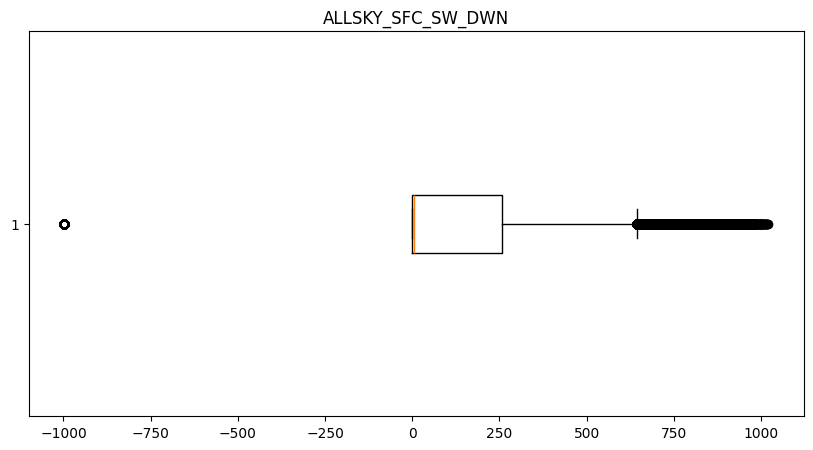

In [6]:
plt.figure(figsize=(10, 5))
plt.boxplot(df['ALLSKY_SFC_SW_DWN'], vert=False)
plt.title('ALLSKY_SFC_SW_DWN')
plt.show()

xuất hiện bất thường cụ thế là 1 giá trị rất bé, có thể coi đó là những dữ liệu thiếu

nguyên nhân có thể do lỗi đo lường hoặc vấn đề khi thu thập dữ liệu, cảm biến bị lỗi,...

In [7]:
sum(df.describe().min() == -999)
# 10 columns have -999 values

10

In [8]:
(df.describe().min() == -999).index[df.describe().min() == -999]

Index(['ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN', 'ALLSKY_SFC_SW_DIFF',
       'ALLSKY_SFC_SW_DNI', 'ALLSKY_SRF_ALB', 'CLOUD_AMT', 'TOA_SW_DWN',
       'ALLSKY_SFC_PAR_TOT', 'ALLSKY_KT', 'CLRSKY_SFC_SW_DWN'],
      dtype='object')

In [9]:
# kiểm tra số lượng giá trị -999 trong df
(df == -999).sum()

Date Time                  0
T2M                        0
ALLSKY_SFC_SW_DWN       3703
RH2M                       0
WS2M                       0
T2MDEW                     0
T2MWET                     0
PS                         0
WS50M                      0
ALLSKY_SFC_LW_DWN       3703
WD50M                      0
WD2M                       0
ALLSKY_SFC_SW_DIFF      3703
ALLSKY_SFC_SW_DNI       3703
ALLSKY_SRF_ALB        102461
CLOUD_AMT               3703
PRECTOTCORR                0
TOA_SW_DWN              3703
WS10M                      0
GWETPROF                   0
TS                         0
WD10M                      0
ALLSKY_SFC_PAR_TOT      3703
QV2M                       0
ALLSKY_KT             102461
CLRSKY_SFC_SW_DWN       3703
GWETROOT                   0
GWETTOP                    0
dtype: int64

10 cột có giá trị -999, tức NaN có số lượng nhiều nhất là 64k, trên tổng 131k mẫu ~ 50%
=> không nên bỏ vì tỉ lệ lớn quá, trong trường hợp xấu nhất, 64k dòng -999 nằm liền kề nhau, ta sẽ bị mất dữ liệu của nhiều năm => ảnh hưởng đến dự đoán cuối cùng

vậy thì cần fill, fill thế nào? 
- ffill? bfill? nếu trong trường hợp xấu nhất, 64k dòng nằm liền kề nhau thì fill như vậy sẽ gây lệch giá trị
- cần tạo 1 giá trị hợp lý theo xu hướng thời tiết, có thể dùng roll mean nhưng nó cũng có nhược điểm như trên, đổi lại roll mean giảm nhiễu và phản ánh tốt xu hướng thời tiết, hoặc dùng nội suy nhưng nội suy sẽ không phù hợp với những ngày có sự thay đổi đột ngột của thời tiết


có nhiều ngày liên tiếp không có dữ liệu
=> sử dụng kết hợp phương pháp nội suy và trung bình động

In [10]:
df.replace(-999, np.nan, inplace=True)


In [11]:
df_filled = df.iloc[:,1:].interpolate(method="linear", limit_direction="both").rolling(window=3, min_periods=1).mean()
df_filled

,T2M,ALLSKY_SFC_SW_DWN,RH2M,WS2M,T2MDEW,T2MWET,PS,WS50M,ALLSKY_SFC_LW_DWN,WD50M,...,WS10M,GWETPROF,TS,WD10M,ALLSKY_SFC_PAR_TOT,QV2M,ALLSKY_KT,CLRSKY_SFC_SW_DWN,GWETROOT,GWETTOP
0,13.230000,0.0,80.270000,0.900000,9.940000,11.580000,100.640000,2.560000,307.380000,186.300000,...,1.690000,0.65,10.760000,186.500000,0.0,7.580000,0.22,0.0,0.59,0.630000
1,12.985000,0.0,81.235000,0.880000,9.875000,11.425000,100.615000,2.505000,305.000000,186.300000,...,1.655000,0.65,10.560000,186.250000,0.0,7.550000,0.22,0.0,0.59,0.630000
2,12.793333,0.0,81.960000,0.846667,9.813333,11.300000,100.596667,2.376667,304.633333,187.533333,...,1.576667,0.65,10.366667,187.400000,0.0,7.523333,0.22,0.0,0.59,0.630000
3,12.446667,0.0,83.150000,0.756667,9.686667,11.066667,100.570000,2.046667,303.190000,192.166667,...,1.370000,0.65,9.986667,192.166667,0.0,7.463333,0.22,0.0,0.59,0.630000
4,12.186667,0.0,83.860000,0.633333,9.556667,10.873333,100.566667,1.596667,302.956667,202.833333,...,1.086667,0.65,9.633333,203.233333,0.0,7.400000,0.22,0.0,0.59,0.630000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,16.310000,0.0,78.106667,0.946667,12.496667,14.406667,100.816667,2.733333,437.250000,328.800000,...,1.773333,0.77,13.583333,328.366667,0.0,8.993333,0.09,0.0,0.70,0.726667
210380,15.710000,0.0,78.713333,0.973333,12.036667,13.876667,100.850000,2.713333,437.250000,322.100000,...,1.786667,0.77,12.873333,321.533333,0.0,8.713333,0.09,0.0,0.70,0.730000
210381,15.096667,0.0,80.473333,1.003333,11.773333,13.436667,100.870000,2.816667,437.250000,317.633333,...,1.853333,0.77,12.316667,316.933333,0.0,8.560000,0.09,0.0,0.70,0.730000
210382,14.393333,0.0,83.030000,1.036667,11.560000,12.976667,100.876667,3.053333,437.250000,316.166667,...,1.976667,0.77,11.830000,315.333333,0.0,8.436667,0.09,0.0,0.70,0.730000


đã xử lý xong các giá trị bất thường -999, kiểm tra lại bảng thống kê mô tả xem còn outliers không

In [12]:
df_filled.describe()

,T2M,ALLSKY_SFC_SW_DWN,RH2M,WS2M,T2MDEW,T2MWET,PS,WS50M,ALLSKY_SFC_LW_DWN,WD50M,...,WS10M,GWETPROF,TS,WD10M,ALLSKY_SFC_PAR_TOT,QV2M,ALLSKY_KT,CLRSKY_SFC_SW_DWN,GWETROOT,GWETTOP
count,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,...,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000
mean,23.330913,152.514379,82.341605,1.738139,19.887622,21.609260,100.097615,3.967683,412.302468,135.854343,...,2.634684,0.735935,23.445422,135.554629,72.527920,15.414143,0.279493,243.867305,0.680769,0.712215
std,6.178109,218.657045,14.197329,1.003782,5.986567,5.868756,0.723002,1.775783,38.380686,80.336210,...,1.303832,0.109767,6.696611,80.555976,103.149193,4.958006,0.149219,309.178640,0.103254,0.098978
min,1.696667,0.000000,17.260000,0.033333,-5.316667,-0.266667,97.336667,0.100000,247.610000,0.266667,...,0.086667,0.500000,0.886667,0.200000,0.000000,2.480000,0.010909,0.000000,0.450000,0.410000
25%,19.166667,0.000000,72.250000,0.973333,16.279167,17.743333,99.503333,2.663333,391.505833,72.500000,...,1.746667,0.650000,19.126667,73.000000,0.000000,11.520000,0.173333,0.000000,0.600000,0.640000
50%,24.673333,22.260000,86.033333,1.500000,21.660000,23.303333,100.046667,3.870000,421.266667,137.200000,...,2.373333,0.730000,24.633333,136.266667,10.510000,16.250000,0.237273,41.516667,0.680000,0.710000
75%,27.670000,255.741667,94.456667,2.300000,24.890000,26.216667,100.643333,5.093333,438.260833,167.966667,...,3.286667,0.820000,27.963333,166.733333,123.557500,19.903333,0.354286,519.458333,0.750000,0.780000
max,41.660000,995.160000,100.000000,11.456667,28.303333,31.890000,103.036667,22.010000,518.480000,359.300000,...,16.920000,0.980000,47.673333,359.566667,461.366667,24.483333,0.783333,999.260000,0.990000,1.000000


In [53]:
# thêm lại ngày tháng vào data
df_filled.insert(0, 'Date Time', df['Date Time'])
df_filled

,Date Time,T2M,ALLSKY_SFC_SW_DWN,RH2M,WS2M,T2MDEW,T2MWET,PS,WS50M,ALLSKY_SFC_LW_DWN,...,WS10M,GWETPROF,TS,WD10M,ALLSKY_SFC_PAR_TOT,QV2M,ALLSKY_KT,CLRSKY_SFC_SW_DWN,GWETROOT,GWETTOP
0,2010-01-01 00:00:00,14.700000,0.0,98.210000,1.040000,14.450000,14.580000,100.540000,3.950000,383.650000,...,1.860000,0.69,14.380000,110.100000,0.0,10.230000,0.15,0.0,0.64,0.700000
1,2010-01-01 01:00:00,14.595000,0.0,98.290000,0.995000,14.355000,14.480000,100.525000,3.810000,382.100000,...,1.805000,0.69,14.285000,105.850000,0.0,10.170000,0.15,0.0,0.64,0.700000
2,2010-01-01 02:00:00,14.493333,0.0,98.310000,0.950000,14.253333,14.376667,100.510000,3.666667,382.783333,...,1.753333,0.69,14.190000,100.100000,0.0,10.106667,0.15,0.0,0.64,0.703333
3,2010-01-01 03:00:00,14.290000,0.0,98.286667,0.886667,14.046667,14.170000,100.486667,3.426667,382.760000,...,1.676667,0.69,14.000000,88.066667,0.0,9.973333,0.15,0.0,0.64,0.706667
4,2010-01-01 04:00:00,14.096667,0.0,98.126667,0.840000,13.833333,13.963333,100.476667,3.206667,383.293333,...,1.616667,0.69,13.810000,74.866667,0.0,9.833333,0.15,0.0,0.64,0.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131491,2024-12-31 19:00:00,16.310000,0.0,78.106667,0.946667,12.496667,14.406667,100.816667,2.733333,437.250000,...,1.773333,0.77,13.583333,328.366667,0.0,8.993333,0.09,0.0,0.70,0.726667
131492,2024-12-31 20:00:00,15.710000,0.0,78.713333,0.973333,12.036667,13.876667,100.850000,2.713333,437.250000,...,1.786667,0.77,12.873333,321.533333,0.0,8.713333,0.09,0.0,0.70,0.730000
131493,2024-12-31 21:00:00,15.096667,0.0,80.473333,1.003333,11.773333,13.436667,100.870000,2.816667,437.250000,...,1.853333,0.77,12.316667,316.933333,0.0,8.560000,0.09,0.0,0.70,0.730000
131494,2024-12-31 22:00:00,14.393333,0.0,83.030000,1.036667,11.560000,12.976667,100.876667,3.053333,437.250000,...,1.976667,0.77,11.830000,315.333333,0.0,8.436667,0.09,0.0,0.70,0.730000


xong rùi, lưu lại file

In [13]:
df_filled.to_csv('hanoi_weather_2001_2024_cleaned.csv', index=False)